<a href="https://colab.research.google.com/github/Geez-l/Project_197/blob/glee-branch/Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### machine learning algorithms ####
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#### metrics of evaluation ####
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import PredictionErrorDisplay

### time series ###
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
## from github
url = "https://raw.githubusercontent.com/Geez-l/Project_197/glee-branch/dataset/dataset.csv"
LR_dataset = pd.read_csv(url)

LR_dataset.head()

,Date,Croptype,Province,Area,Production,Yield
0,1987-01-01,Irrigated Palay,Aklan,6130.0,19309.0,3.149918
1,1987-01-01,Irrigated Palay,Antique,9030.0,28275.0,3.131229
2,1987-01-01,Irrigated Palay,Capiz,6300.0,18540.0,2.942857
3,1987-01-01,Irrigated Palay,Guimaras,6300.0,18540.0,2.942857
4,1987-01-01,Irrigated Palay,Iloilo,21270.0,58187.0,2.735637


In [7]:
## croptypes
LR_dataset['Croptype'].unique()

array(['Irrigated Palay', 'Rainfed Palay', 'Palay', 'White Corn',
       'Yellow Corn', 'Corn'], dtype=object)

In [6]:
## province
LR_dataset['Province'].unique()

array(['Aklan', 'Antique', 'Capiz', 'Guimaras', 'Iloilo'], dtype=object)

In [9]:
## one hot encoding

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')

In [19]:
oheTransform_crop = ohe.fit_transform(LR_dataset[['Croptype']])

In [20]:
oheTransform_crop

,Croptype_Corn,Croptype_Irrigated Palay,Croptype_Palay,Croptype_Rainfed Palay,Croptype_White Corn,Croptype_Yellow Corn
0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
4495,1.0,0.0,0.0,0.0,0.0,0.0
4496,1.0,0.0,0.0,0.0,0.0,0.0
4497,1.0,0.0,0.0,0.0,0.0,0.0
4498,1.0,0.0,0.0,0.0,0.0,0.0


In [21]:
oheTransform_province = ohe.fit_transform(LR_dataset[['Province']])

In [22]:
oheTransform_province

,Province_Aklan,Province_Antique,Province_Capiz,Province_Guimaras,Province_Iloilo
0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
4495,1.0,0.0,0.0,0.0,0.0
4496,0.0,1.0,0.0,0.0,0.0
4497,0.0,0.0,1.0,0.0,0.0
4498,0.0,0.0,0.0,1.0,0.0


In [24]:
## drop crop type and province
LR_dataset1 = pd.concat([LR_dataset, oheTransform_province, oheTransform_crop], axis=1)
LR_dataset1 = LR_dataset1.drop(['Croptype', 'Province'], axis=1)

In [25]:
LR_dataset1

,Date,Area,Production,Yield,Province_Aklan,Province_Antique,Province_Capiz,Province_Guimaras,Province_Iloilo,Croptype_Corn,Croptype_Irrigated Palay,Croptype_Palay,Croptype_Rainfed Palay,Croptype_White Corn,Croptype_Yellow Corn
0,1987-01-01,6130.0,19309.00,3.149918,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1987-01-01,9030.0,28275.00,3.131229,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1987-01-01,6300.0,18540.00,2.942857,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1987-01-01,6300.0,18540.00,2.942857,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1987-01-01,21270.0,58187.00,2.735637,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,2024-04-01,114.0,284.00,2.491228,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4496,2024-04-01,984.0,3787.29,3.848872,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4497,2024-04-01,2581.0,11107.34,4.303503,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4498,2024-04-01,70.0,56.00,0.800000,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [26]:
## linear regression algorithm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [27]:
model = LinearRegression()

In [28]:
LR_dataset1.columns

Index(['Date', 'Area', 'Production', 'Yield', 'Province_Aklan',
       'Province_Antique', 'Province_Capiz', 'Province_Guimaras',
       'Province_Iloilo', 'Croptype_Corn', 'Croptype_Irrigated Palay',
       'Croptype_Palay', 'Croptype_Rainfed Palay', 'Croptype_White Corn',
       'Croptype_Yellow Corn'],
      dtype='object')

In [30]:
LR_dataset1['Area']

,Area
0,6130.0
1,9030.0
2,6300.0
3,6300.0
4,21270.0
...,...
4495,114.0
4496,984.0
4497,2581.0
4498,70.0


In [55]:
features = LR_dataset1[['Production','Area','Province_Aklan', 'Province_Antique', 'Province_Capiz','Province_Guimaras', 'Province_Iloilo', 'Croptype_Corn', 'Croptype_Irrigated Palay','Croptype_Palay', 'Croptype_Rainfed Palay', 'Croptype_White Corn', 'Croptype_Yellow Corn']]
target = LR_dataset1[['Yield']]

In [56]:
## splitting the dataset
x_train , x_test, y_train, y_test = train_test_split(features,target,test_size = 0.30 ,random_state = 42)

In [57]:
## check sizes

print("x_train size:",x_train.shape)
print("y_train size:",y_train.shape)
print("x_test size:",x_test.shape)
print("y_test size:",y_test.shape)

x_train size: (3150, 13)
y_train size: (3150, 1)
x_test size: (1350, 13)
y_test size: (1350, 1)


In [59]:
# Initializing and fitting the model
OLS = LinearRegression()
OLS.fit(x_train, y_train)

# Evaluate the model on the test set
y_pred = OLS.predict(x_test)

In [60]:
# Getting the coefficients
ols_coefficients = OLS.coef_
print(f"Coefficients:\n {ols_coefficients}")

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

r2 = r2_score(y_test, y_pred, multioutput='uniform_average')  # For multivariate regression
print(f"R-squared: {r2}")

Coefficients:
 [[ 2.80264702e-05 -7.51966482e-05 -8.91476844e-02  1.06213183e-01
   1.07154928e-01 -2.77285837e-01  1.53065410e-01 -3.50086030e-01
   8.52307644e-01  4.13390023e-01  1.50543691e-01 -9.11100304e-01
  -1.55055024e-01]]
Mean Squared Error: 0.7065679976489605
R-squared: 0.4762911069110972


In [63]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import root_mean_squared_error
import numpy as np

# Calculate MAPE
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape}")

# Calculate RMSE
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Percentage Error (MAPE): 0.583733495062672
Root Mean Squared Error (RMSE): 0.8405759915968101


In [67]:
# prompt: calculate mae

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

Mean Absolute Error (MAE): 0.6505888928627779


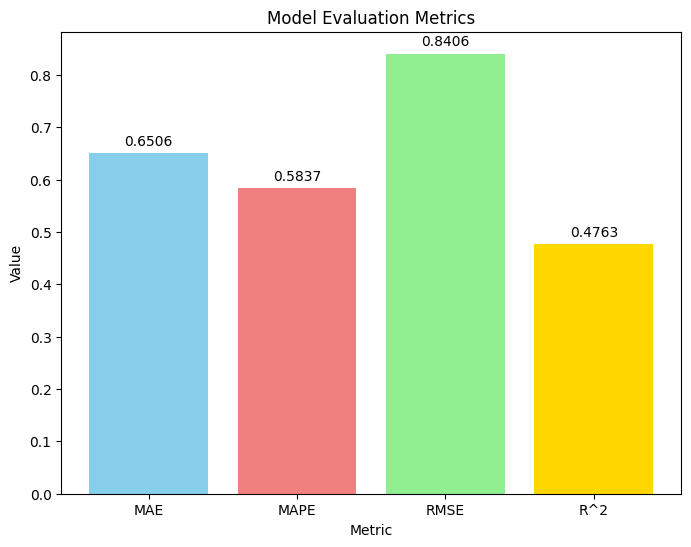

In [73]:
metrics = {
    'MAE': mae,
    'MAPE': mape,
    'RMSE': rmse,
    'R^2': r2
}

metrics_names = list(metrics.keys())
metrics_values = list(metrics.values())

plt.figure(figsize=(8, 6))
plt.bar(metrics_names, metrics_values, color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
plt.title('Model Evaluation Metrics')
plt.xlabel('Metric')
plt.ylabel('Value')

# Add value labels on top of the bars
for i, v in enumerate(metrics_values):
    plt.text(i, v + 0.01, str(round(v, 4)), ha='center', va='bottom') # Adjust 0.01 for better positioning

plt.show()

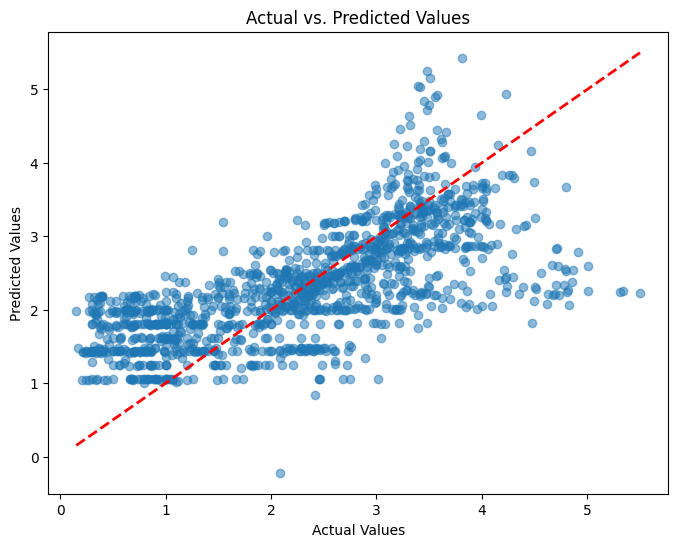

In [70]:
# Scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Diagonal line for reference
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

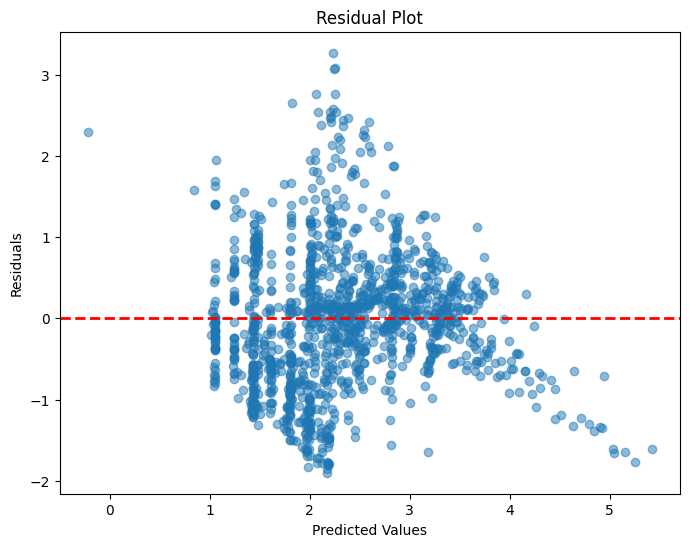

In [71]:
# Residual plot
residuals = y_test.values.ravel() - y_pred.ravel()  # Calculate residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--', lw=2)  # Horizontal line at 0
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

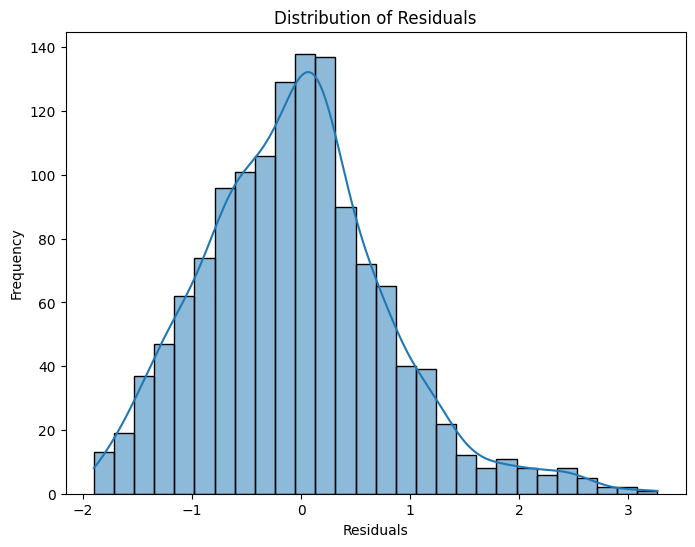

In [72]:
# Histogram of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)  # kde=True adds a kernel density estimate
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()